In [68]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import f1_score,confusion_matrix

from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

In [70]:
####from the sencond part of the project, we chose 5 variebles 

In [90]:
bcd=pd.read_csv('data.csv')
y = bcd.diagnosis
# drop_list = ['Unnamed: 32','id','diagnosis']
# x = bcd.drop(list,axis = 1 )
# drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
#               'compactness_se','concave points_se','texture_worst','area_worst']
# x_1=x.drop(drop_list1,axis=1)
x = bcd[['area_mean','concavity_mean','area_se','concavity_worst','concavity_se']]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3,random_state=1111)

# logistic Regression

In [91]:
# logistic Regression
mod=LogisticRegression()
mod.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
#What is the validation accuracy
predictions = mod.predict(x_test)
score = mod.score(x_test, y_test)
print(score)

0.9122807017543859


In [93]:
metrics.accuracy_score(predictions,y_test)

0.9122807017543859

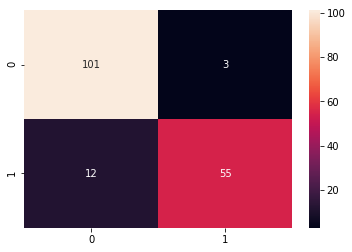

In [94]:
# sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
#             xticklabels=range(3),
#             yticklabels=range(3))
# plt.ylabel('true label')
# plt.xlabel('predicted label');

cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d") #### why the label has no name

# Random forest model

In [95]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model

In [96]:
model.fit(x_train,y_train)
prediction = model.predict(x_test)
metrics.accuracy_score(prediction,y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9415204678362573

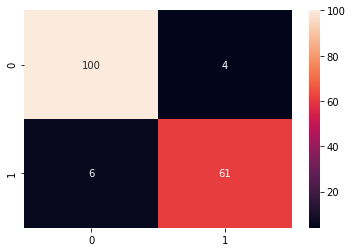

In [97]:
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt="d") 

#  SVM

In [98]:
model = svm.SVC()
model.fit(x_train,y_train)
prediction_=model.predict(x_test)
metrics.accuracy_score(prediction_,y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

0.5789473684210527

SVM is giving only 0.5789